In [1]:
using DataFrames
using CSV
using Plots
using LaTeXStrings
using Plots.PlotMeasures


In [2]:
pyplot()
theme(:vibrant)

In [18]:
df = CSV.File("fmnist_sens_processed.csv") |> DataFrame

98×4 DataFrame
 Row │ meas     C        ep       imprv      
     │ String3  Float64  Float64  Float64    
─────┼───────────────────────────────────────
   1 │ AID         -4.0     -4.0    9.13558
   2 │ AOD         -4.0     -4.0    3.04893
   3 │ AID         -4.0     -3.0   15.4941
   4 │ AOD         -4.0     -3.0    3.37994
   5 │ AID         -4.0     -2.0    2.60744
   6 │ AOD         -4.0     -2.0    1.38641
   7 │ AID         -4.0     -1.0   11.3016
   8 │ AOD         -4.0     -1.0    4.51581
   9 │ AID         -4.0      0.0    6.8432
  10 │ AOD         -4.0      0.0    1.64632
  11 │ AID         -4.0      1.0   10.3578
  ⋮  │    ⋮        ⋮        ⋮         ⋮
  89 │ AID          2.0     -2.0  -65.0544
  90 │ AOD          2.0     -2.0  -19.9502
  91 │ AID          2.0     -1.0  -73.624
  92 │ AOD          2.0     -1.0  -23.8089
  93 │ AID          2.0      0.0  -76.1089
  94 │ AOD          2.0      0.0  -24.0718
  95 │ AID          2.0      1.0  -81.4241
  96 │ AOD          2.0      1.0  -27.2588
  97 │ AID          2.0      2.0  -84.7855
  98 │ AOD          2.0      2.0  -26.2012
                              77 rows omitted

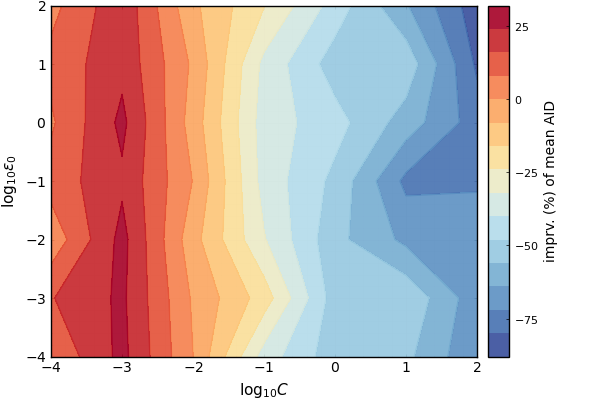

In [19]:
df_ = filter(row -> row[:meas] == "AID", df)
vs = Matrix(df_[:, 2:4])'
aid_map = Dict()
for row in 1:size(vs, 2)
    c, ep, v = vs[1, row], vs[2, row], vs[3, row]
    c = Int(c)
    ep = Int(ep)
    
    push!(aid_map, "$c $ep" => v)
end 

a = [-4, -3, -2, -1, 0, 1, 2]

p1 = contourf(a, a, (x, y)->aid_map["$x $y"], #c=:summer, 
              alpha=.9, colorbar=:best,
              margin = 0.0mm,
              xlabel=L"$\log_{10} C$",
              ylabel=L"$\log_{10} \epsilon_0$",
              colorbartitle="imprv. (%) of mean AID",
              tickfontsize=10,
              framestyle=:box)


In [20]:
savefig("sens_fmnist_aid_contour.pdf")

In [21]:
df_ = filter(row -> row[:meas] == "AOD", df)
vs = Matrix(df_[:, 2:4])'
aod_map = Dict()
for row in 1:size(vs, 2)
    c, ep, v = vs[1, row], vs[2, row], vs[3, row]
    c = Int(c)
    ep = Int(ep)
    
    push!(aod_map, "$c $ep" => v)
end 

a = [-4, -3, -2, -1, 0, 1, 2]

p2 = contourf(a, a, (x, y)->aod_map["$x $y"], #c=:summer, 
              alpha=.9, colorbar=:best,
              margin = 0.0mm,
              xlabel=L"$\log_{10} C$",
              ylabel=L"$\log_{10} \epsilon_0$",
              colorbartitle="imprv. (%) of mean AOD",
              tickfontsize=10,
              framestyle=:box)

In [22]:
savefig("sens_fmnist_aod_contour.pdf")

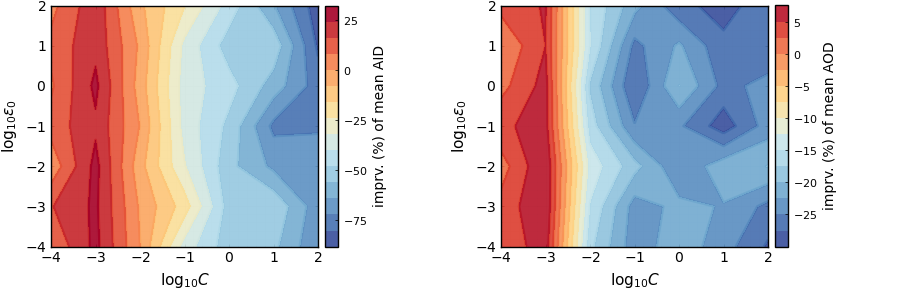

In [23]:
p = plot(p1, p2, l=(1, 2), size=(900, 290))

In [26]:
savefig(p, "sens_fmnist_contour.pdf")

# Animals

In [3]:
df = CSV.File("animals_sens_processed.csv") |> DataFrame

98×4 DataFrame
 Row │ meas     C        ep       imprv       
     │ String3  Float64  Float64  Float64     
─────┼────────────────────────────────────────
   1 │ AID         -3.0     -3.0   -0.156941
   2 │ AOD         -3.0     -3.0   -0.211034
   3 │ AID         -3.0     -2.0    0.850342
   4 │ AOD         -3.0     -2.0    0.258343
   5 │ AID         -3.0     -1.0    0.954394
   6 │ AOD         -3.0     -1.0    0.246844
   7 │ AID         -3.0      0.0    1.05409
   8 │ AOD         -3.0      0.0    0.19917
   9 │ AID         -3.0      1.0    0.397395
  10 │ AOD         -3.0      1.0    0.277655
  11 │ AID         -3.0      2.0    0.422192
  ⋮  │    ⋮        ⋮        ⋮          ⋮
  89 │ AID          3.0     -1.0  -75.4192
  90 │ AOD          3.0     -1.0  -14.519
  91 │ AID          3.0      0.0  -77.7432
  92 │ AOD          3.0      0.0  -15.9317
  93 │ AID          3.0      1.0  -83.4885
  94 │ AOD          3.0      1.0  -20.1112
  95 │ AID          3.0      2.0  -91.0598
  96 │ AOD          3.0      2.0  -23.8219
  97 │ AID          3.0      3.0  -87.6381
  98 │ AOD          3.0      3.0  -22.7257
                               77 rows omitted

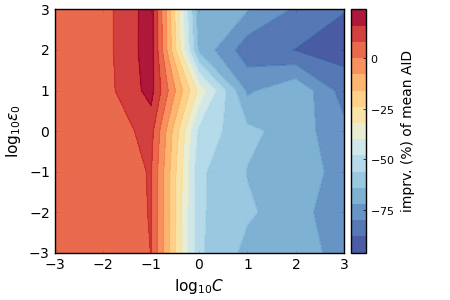

In [4]:
df_ = filter(row -> row[:meas] == "AID", df)
vs = Matrix(df_[:, 2:4])'
aod_map = Dict()
for row in 1:size(vs, 2)
    c, ep, v = vs[1, row], vs[2, row], vs[3, row]
    c = Int(c)
    ep = Int(ep)
    
    push!(aod_map, "$c $ep" => v)
end 

a = [-3, -2, -1, 0, 1, 2, 3]

p1 = contourf(a, a, (x, y)->aod_map["$x $y"], #c=:summer, 
             alpha=.9, colorbar=:best,
             xlabel=L"$\log_{10} C$",
             ylabel=L"$\log_{10} \epsilon_0$",
             colorbartitle="imprv. (%) of mean AID",
             tickfontsize=10,
             framestyle=:box, size=(450, 300))

In [5]:
savefig("sens_animals_aid_contour.pdf")

In [6]:
df_ = filter(row -> row[:meas] == "AOD", df)
vs = Matrix(df_[:, 2:4])'
aod_map = Dict()
for row in 1:size(vs, 2)
    c, ep, v = vs[1, row], vs[2, row], vs[3, row]
    c = Int(c)
    ep = Int(ep)
    
    push!(aod_map, "$c $ep" => v)
end 

a = [-3, -2, -1, 0, 1, 2, 3]

p2 = contourf(a, a, (x, y)->aod_map["$x $y"], #c=:summer, 
             alpha=.9, colorbar=:best,
             xlabel=L"$\log_{10} C$",
             ylabel=L"$\log_{10} \epsilon_0$",
             colorbartitle="imprv. (%) of mean AOD",
             tickfontsize=10,
             framestyle=:box, size=(450, 300))

In [7]:
savefig("sens_animals_aod_contour.pdf")

In [8]:
p = plot(p1, p2, l=(1, 2), size=(900, 290))

In [35]:
savefig(p, "sens_animals_contour.pdf")